In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as se
%matplotlib inline

data = pd.read_csv('training.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# **Data Description**

**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse

**RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age** Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome:** Monthly income

**NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines:** Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse:** Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)




**The purpose here is to predict the probability of a person to default. The target attribute is SeriousDlqin2yrs**

The attributes here are discreet values of 0 & 1 as we will see below. Predicting the probability rather than the binary value is due to the fact lenders will need to use the probability to assess and make decision.



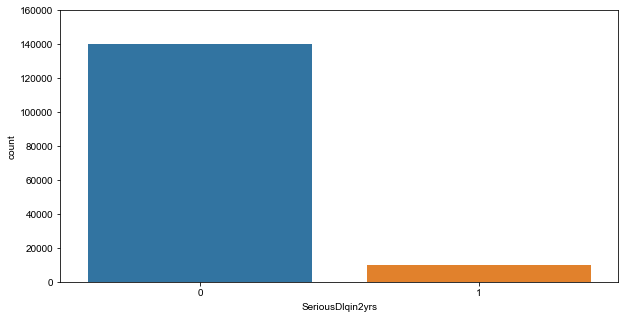

In [3]:
plt.figure(figsize=(10,8))
se.countplot("SeriousDlqin2yrs", data=data)
ax = se.countplot(x = data.SeriousDlqin2yrs)
se.set(font_scale=1.5)
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

In [4]:
#Let's count the number of samples per class

class_0 = data.SeriousDlqin2yrs.value_counts()[0]
class_1 = data.SeriousDlqin2yrs.value_counts()[1]

print('Total Number of Class 0: ', class_0)
print('Total Number of Class 1: ', class_1)

Total Number of Class 0:  139974
Total Number of Class 1:  10026


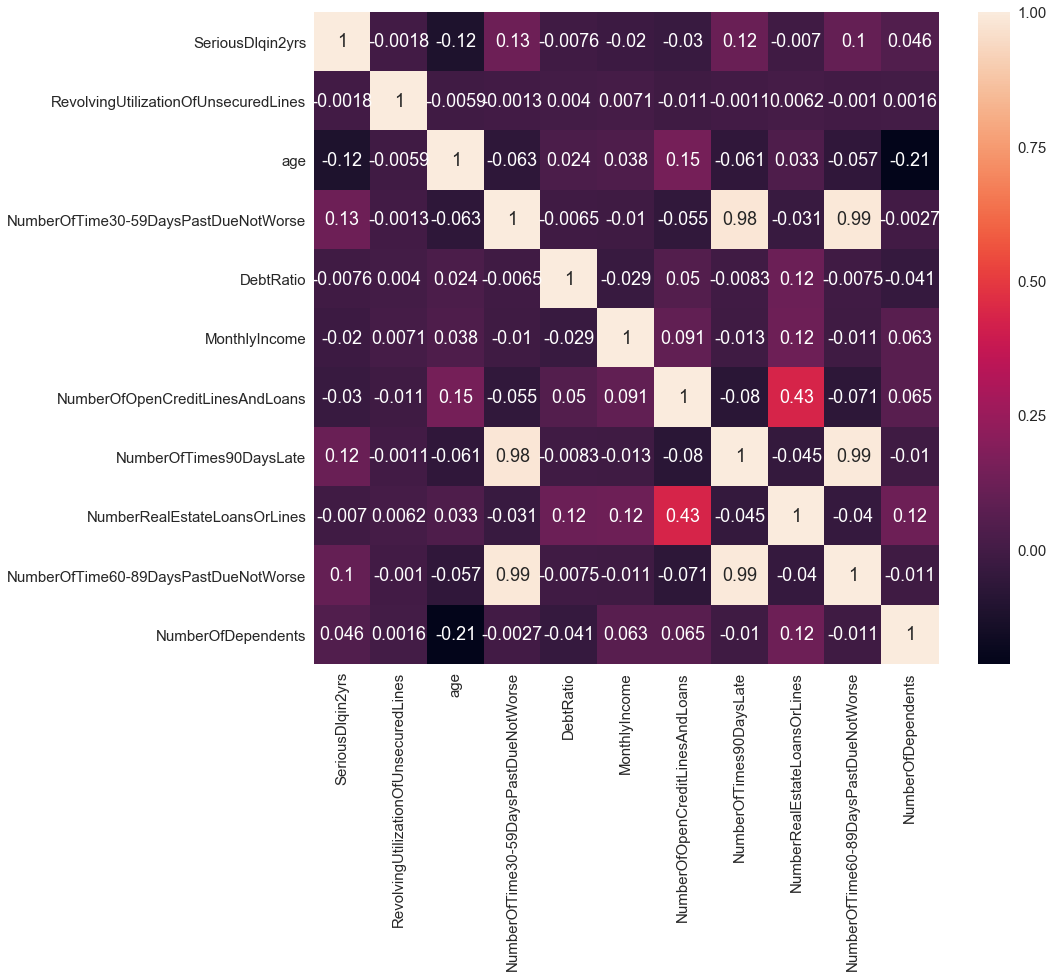

In [5]:
#Test correlation between feautres
#Correlation heatmap
corr = data.corr()
plt.figure(figsize=(14,12))
se.heatmap(corr, annot=True)

**It is noticeable that there is a slight correlation between the ** *SeriousDlqin2yrs* and = *NumberOfTime30-59DaysPastDueNotWorse* AND *NumberOfTimes90DaysLate* AND *NumberOfTime60-89DaysPastDueNotWorse* . 

**This correlation can be troublesome for the algorithm, for now we will proceed without dealing with this to see how the algorithm will be affected by such dependancy in the feautres.**

**This imbalance in the samples from each class is something that we have to work on. In real life the ratio somwhat similar and in our modeling we need to have the same representation without compromising the performance of the model. In other words our model have to be decently sensitive to each class and precise in the detection.**

In [6]:
# Test missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


**MonthlyIncome** and **NumberOfDependents** have some missing values. Now since we already have an imbalanced dataset, let's see which of the classes contain the more of the missing values from both classes.

In [7]:
misssample = data[['NumberOfDependents', 'MonthlyIncome', 'SeriousDlqin2yrs']]
misssample0 = misssample.loc[misssample['SeriousDlqin2yrs'] == 0]
misssample1 = misssample.loc[misssample['SeriousDlqin2yrs'] == 1]
print('Report counts of missing values from each class')
print('\n Class 0 \n \n Number of missing values for class 0:\n', misssample0.isnull().sum())
print('\n Class 1 \n \n Number of missing values for class 1:\n', misssample1.isnull().sum())

Report counts of missing values from each class

 Class 0 
 
 Number of missing values for class 0:
 NumberOfDependents     3745
MonthlyIncome         28062
SeriousDlqin2yrs          0
dtype: int64

 Class 1 
 
 Number of missing values for class 1:
 NumberOfDependents     179
MonthlyIncome         1669
SeriousDlqin2yrs         0
dtype: int64


I am not a fan of filling the missing values with the mean because the mean is just mean. I believe that there should be a smarter way to ago about replacing missing values. Anyhow, if you have time then you can try to be creative and experiment with different unorthodox methods. This is some interesting way **[SimpleImputer](http://scikit-learn.org/dev/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)** class from Scikit-Learn. It is a handy method to use for the in hurry type. I am just gonna use the casual way of replacing missing values with the statistical mean.

In [13]:
data = data.fillna(data.mean())

In [ ]:
                        150000 non-null int64
    150000 non-null float64
                                     150000 non-null int64
    150000 non-null int64
                               150000 non-null float64
                           120269 non-null float64
         150000 non-null int64
                 150000 non-null int64
            150000 non-null int64
    150000 non-null int64
      

In [15]:
# Separating train and test samples by 30 for the testing 
from sklearn.model_selection import train_test_split

X = data [['RevolvingUtilizationOfUnsecuredLines', 'age',
          'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
          'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
          'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfDependents']]
y = data [['SeriousDlqin2yrs']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Coefficients: 
 [[-2.60191942e-06 -1.62770896e-03  4.71222572e-02 -5.29914208e-07
  -2.16442542e-07 -5.82042522e-04  5.43634889e-02  5.67879128e-04
  -9.52472631e-02  4.06343217e-03]]
Mean squared error: 0.06
Variance score: 0.05


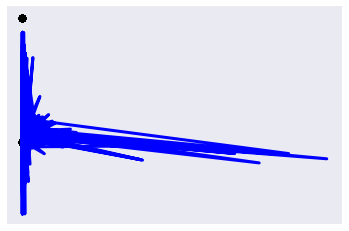

In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(X_test['age'], y_test,  color='black')
plt.plot(X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Clearly it was a disaster, we supposed to see one line and few black spots but we are seeing whatever that might look like for you. Few things to take note in this experiment:
- The data was raw and didn't perform any of the necessary data scaling.
- The dependancy on the data wasn't looked at.
- I didn't perform any sort of features engineering.

I will start my attempts by scaling the features.

In [27]:
# look at the first columns here, see how the range of the numbers vary
X_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
59770,0.029690,57,0,0.283244,10121.000000,7,0,1,0,0.0
21362,0.000000,57,0,0.142562,7750.000000,9,0,1,0,0.0
127324,0.036569,48,0,0.236294,6000.000000,6,0,2,0,3.0
140509,1.018331,41,0,0.163138,4958.000000,4,0,0,0,0.0
144297,1.008799,49,0,3942.000000,6670.221237,10,0,1,0,0.0


Data standradization is a common requirments for machine learning algorithms and consquence of ignoring this step is a very bad performance of the algorithm. The data will have to be normally distributed; **Gaussian with zero mean and unit variance.**

In [36]:
from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [58]:
X_test_scaled[0:45000,0].shape

(45000,)

Coefficients: 
 [[-0.00067468 -0.02405712  0.20298814 -0.00093217 -0.00303601 -0.00299446
   0.23295372  0.00064128 -0.40679174  0.00448294]]
Mean squared error: 0.06
Variance score: 0.05


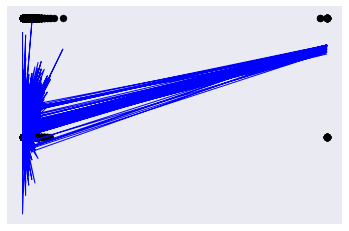

In [63]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_scaled, y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test_scaled)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(X_test_scaled[0:45000,2], y_test,  color='black')
plt.plot(X_test_scaled[0:45000,2], diabetes_y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

Clear overfitting in this model. There is some sparsity in the dataset and I didn't check for outliers as well. You can see the MSE value at 0.06 and the blue lines seems like trying so hard to go through all the points. One think that I am doing wrong here is that I am plotting using only one vector whereas my model trained on all the features. I was just trying to make the plotting easier because we cannot plot in more than 3 dimensions. A wise thing to do is to reduce the dimensionality of the dataset into a lower space and that could help the weak model to learn or even make somewhat better visualz. *I will rework the dataset with PCA to reduce its dimensions.*

Automatically created module for IPython interactive environment


/Users/faris/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faris/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faris/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faris/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/Users/faris/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faris/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faris/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faris/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

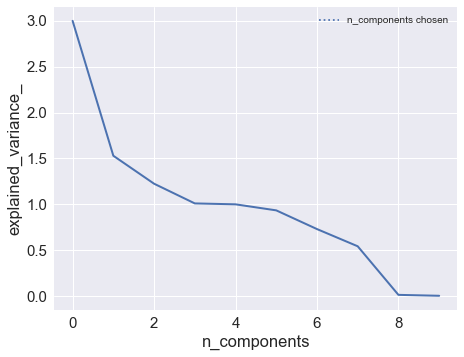

In [70]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Plot the PCA spectrum
pca.fit(X_train_scaled)

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [1, 4, 6, 10]
Cs = np.logspace(1, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train_scaled, y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=10))
plt.show()

In [66]:
estimator.best_estimator_.named_steps['pca'].n_components

10